#Steps involved 
#1)PREPROCESSING + EDA +FEATURE SELECTION
#2) EXTRACT INPUT AND OUPUT COLOUMNS
#3)TRAIN TEST SPLIT
#4)TRAIN THE MODEL
#5)Evaluate the model/ Model selection
#6)Deploy the model



In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
df = pd.read_csv("/content/placement.csv")

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info

<bound method DataFrame.info of     Unnamed: 0  cgpa   iq  placement
0            0   6.8  123          1
1            1   5.9  106          0
2            2   5.3  121          0
3            3   7.4  132          1
4            4   5.8  142          0
..         ...   ...  ...        ...
95          95   4.3  200          0
96          96   4.4   42          0
97          97   6.7  182          1
98          98   6.3  103          1
99          99   6.2  113          1

[100 rows x 4 columns]>

# Preprocessing 

In [ ]:
df = df.iloc[:,1:]
#removing the first coloumn as it was unnecessary

In [ ]:
df.info

<bound method DataFrame.info of     cgpa   iq  placement
0    6.8  123          1
1    5.9  106          0
2    5.3  121          0
3    7.4  132          1
4    5.8  142          0
..   ...  ...        ...
95   4.3  200          0
96   4.4   42          0
97   6.7  182          1
98   6.3  103          1
99   6.2  113          1

[100 rows x 3 columns]>

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [ ]:
import matplotlib.pyplot as plt
# x axis will be cgpa and y axis will be iq 

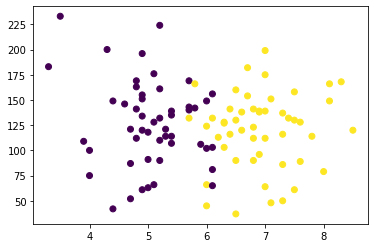

In [ ]:
plt.scatter(df['cgpa'],df['iq'], c =df['placement'])

#CGPA and IQ are independent variable 

and 

#placement is dependent variable

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X


,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [ ]:
X.shape

(100, 2)

In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
y.shape

(100,)

# Now building A MACHINE LEARNING MODEL WE ARE USING LOGISTIC REGRESSION 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test, y_train, y_test= train_test_split(X, y, test_size =0.2)

In [ ]:
X_train

,cgpa,iq
69,8.5,120
71,6.1,132
12,5.4,139
70,6.3,127
38,6.5,160
...,...,...
68,4.0,75
31,3.9,109
51,4.8,141
80,4.9,196


In [ ]:
len(X_test)

20

#Scaling the value in the range of -1 to 1 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 2.26490434, -0.13942203],
       [ 0.10892202,  0.15028608],
       [-0.51990615,  0.31928248],
       [ 0.28858722,  0.02957437],
       [ 0.46825241,  0.82627167],
       [-1.41823212,  0.5607059 ],
       [-0.25040836,  1.04355275],
       [-0.60973875, -0.11527968],
       [-1.05890173, -0.33256077],
       [-0.60973875, -0.28427608],
       [-0.16057577,  0.97112572],
       [ 0.46825241, -2.14323644],
       [ 1.90557395,  0.5607059 ],
       [ 0.82758279,  0.31928248],
       [ 0.6479176 ,  0.68141761],
       [ 0.10892202, -0.54984185],
       [ 0.91741539,  0.31928248],
       [-0.78940394,  0.05371671],
       [ 1.18691318,  0.27099779],
       [ 0.46825241,  0.1020014 ],
       [-0.87923654, -1.51553554],
       [-0.96906913, -1.56382022],
       [ 0.10892202, -1.46725085],
       [ 0.46825241, -0.8636923 ],
       [ 1.36657837, -1.56382022],
       [-2.40639068,  1.38154554],
       [ 0.37841981, -0.2359914 ],
       [-0.96906913,  0.70555995],
       [-0.96906913,

In [ ]:
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

#Model evaluation

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
y_test

53    1
94    0
19    0
55    1
63    1
72    1
67    0
0     1
45    1
58    1
23    0
62    0
54    1
4     0
21    1
25    0
18    0
66    1
75    0
24    0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.95

In [ ]:
from mlxtend.plotting import plot_decision_regions


TypeError: ignored

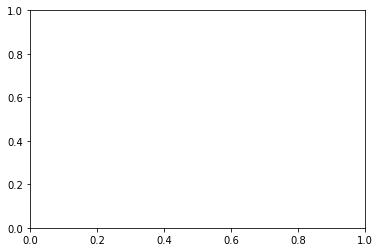

In [ ]:
import matplotlib.pyplot as plt
z = y_pred.reshape((10, 2))
plt.contourf(X_train, y_train.values,z , alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions')

plt.show()

TypeError: ignored

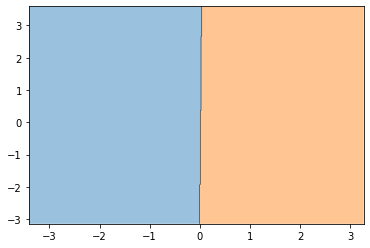

In [ ]:
plot_decision_regions(X_train, y_train.values, clf =clf, legend =2 )
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl', 'wb'))